In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [2]:
Aer.backends()
backend = Aer.get_backend('statevector_simulator')

In [3]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [4]:
FR = np.array([[1, 1],
              [1, 1]])
CR=np.array([1,10])

# Normalize weights
CR = CR/np.max(CR)

In [5]:
# FR = np.array([[1, 0,1, 0],
#               [0, 1,1, 0],
#               [0, 0,0, 1]])
# # CR=np.array([1,1,2.125,1])
# CR=np.random.rand(4)

# # Normalize weights
# CR = CR/np.max(CR)

In [6]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [7]:
# F, R  = np.shape(FR)

In [8]:
# c=cost_vector(CR,FR,1,plotsolutions=True)

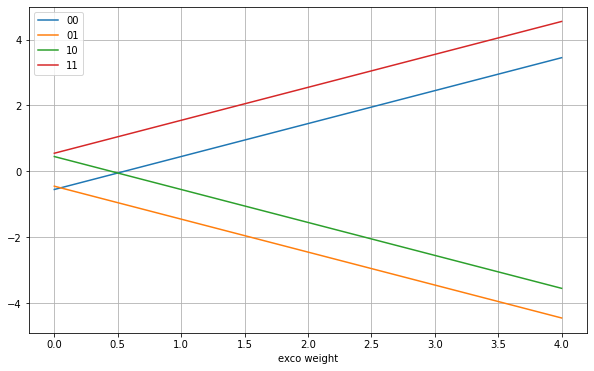

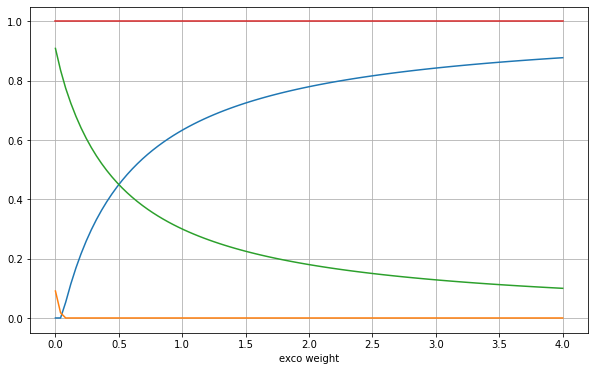

In [9]:
x, e, es, ue, lab = getSpectrum(CR, FR)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

pl.figure(figsize=(10,6))
for i in range(e.shape[0]):
    pl.plot(x,es[i,:])
pl.xlabel("exco weight")
pl.grid()

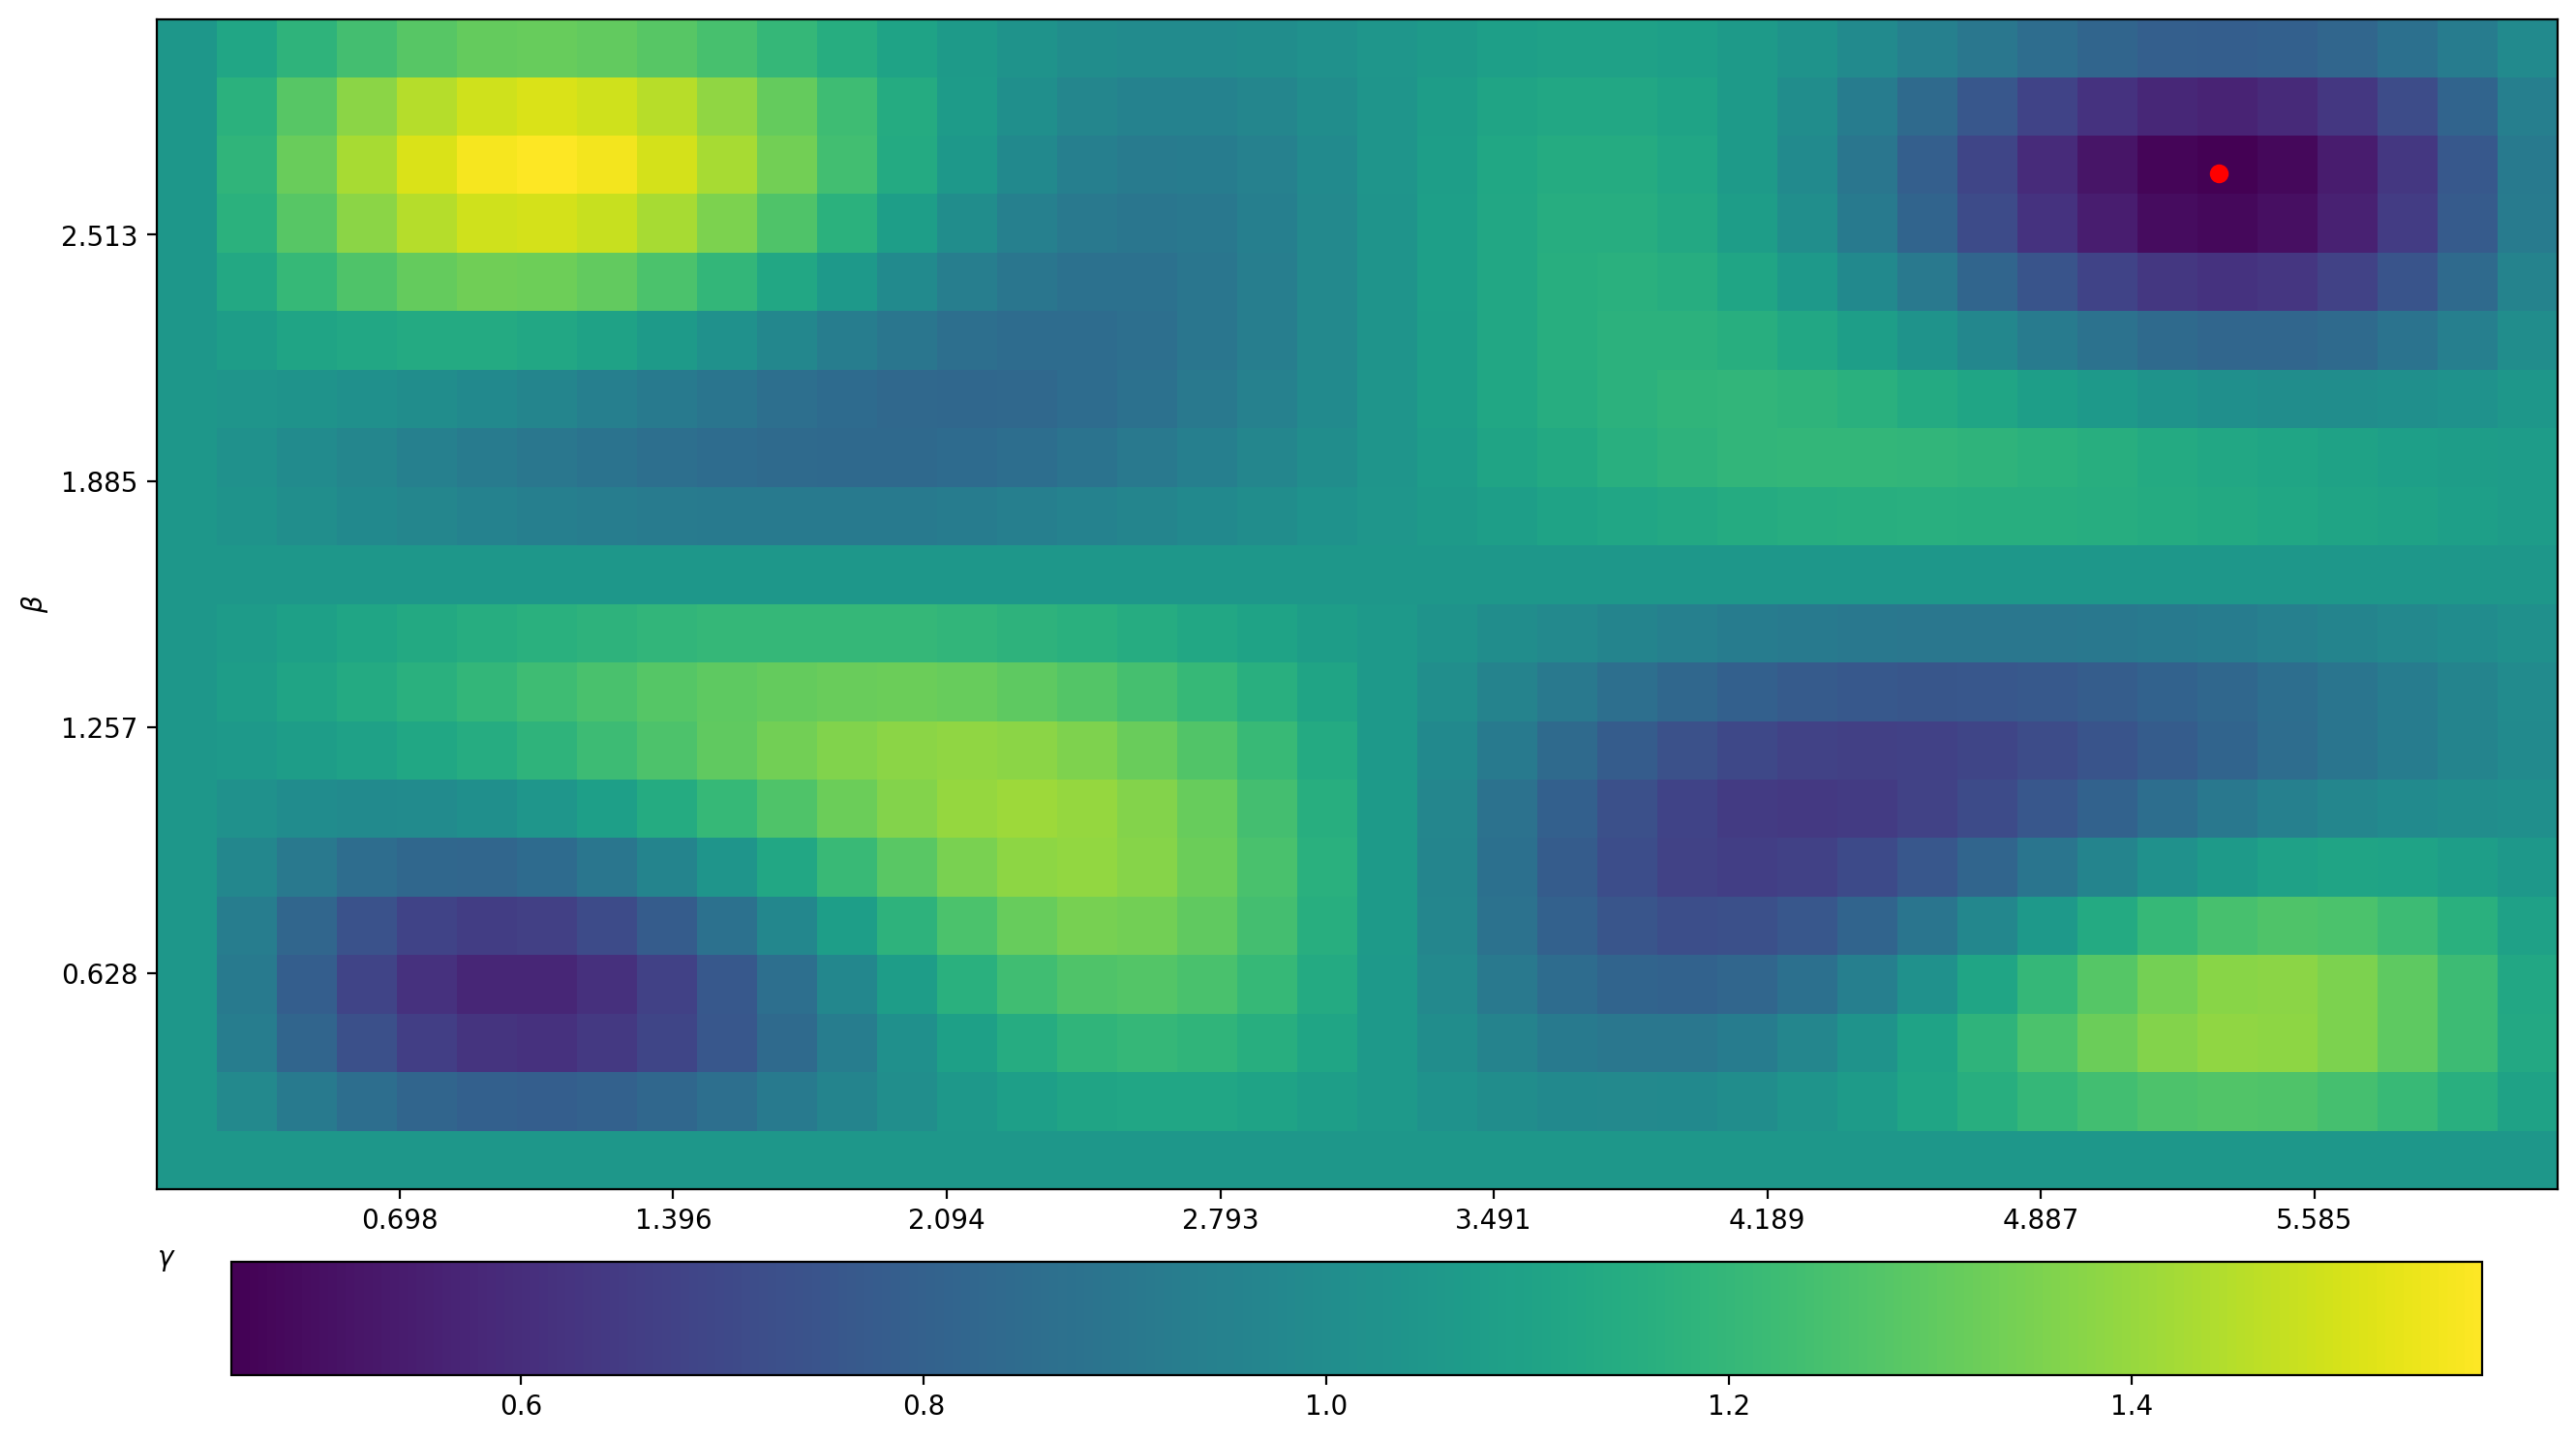

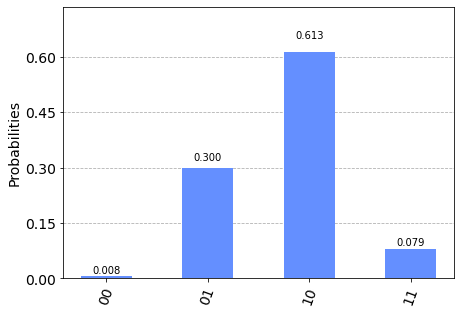

In [13]:
mu=.5
qaoaSwe=QAOASwe(CR, FR)

E, x0, job, ji = qaoaSwe.getElandscape(backend,mu)

_=getfig(E)

pl.plot(x0[0],x0[1],'ro')

_=plot_histogram(job.result().get_counts()[int(ji)])

In [11]:
qc = createCircuitSwe(x0.flatten(), FR,CR, mu=1, depth=1)
job=execute(qc, backend)
_=plot_histogram(job.result().get_counts())

NameError: name 'createCircuitSwe' is not defined

In [ ]:
# job.result().get_counts(),
job.result().results[int(ji)].data.statevector

In [ ]:
mu=2
E, x0, job, ji = getElandscape(backend,createCircuitChoose,FR,CR,mu,useExco=[True])

_=getfig(E)

pl.plot(x0[0],x0[1],'ro')

_=plot_histogram(job.result().get_counts()[int(ji)])

In [ ]:
mu=2
E, x0, job, ji = getElandscape(backend,createCircuitChoose,FR,CR,mu,useExco=[False])

_=getfig(E)

pl.plot(x0[0],x0[1],'ro')

_=plot_histogram(job.result().get_counts()[int(ji)])

In [ ]:
mu=2
E, x0, job, ji = getElandscape(backend,createCircuitSwe,FR,CR,mu)

_=getfig(E)

pl.plot(x0[0],x0[1],'ro')

_=plot_histogram(job.result().get_counts()[int(ji)])t

In [ ]:
np.linspace(0,1,4,endpoint=False)